In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_excel('Monohulled_coastline_avg_Numerical.xlsx',index_col=0)
data.head()

,Make,Variant,Length \n(ft),Geographic Region,Country/Region/State,Year,Beam (ft),Draft (ft),Displacement (lbs),Sail Area (sq ft),Average cargo throughput (tons),GDP (USD billon),GDP per capita (USD),Engine Hours,coastline(km),Listing Price (USD)
0,2,290,41,1,14,2005,12.63,3.94,22046,824,45350000,2939.0,44494,15,4853.0,267233.000000
1,7,15,38,1,8,2005,12.99,6.07,15432,721,595000,57.8,13647,15,5835.0,65554.666667
2,7,16,38,1,8,2005,12.99,6.07,15432,721,595000,57.8,13647,15,5835.0,53447.000000
3,7,15,38,1,17,2005,12.99,6.07,15432,721,3150000,204.0,19147,15,13676.0,91101.000000
4,7,26,39,1,17,2005,13.02,6.23,19621,776,3150000,204.0,19147,15,13676.0,66748.000000


In [3]:

# 特征数据和标签数据拆分，y为标签数据，除y之外的为特征数据；
Y = data['Listing Price (USD)']
X =  data.drop(columns=['Listing Price (USD)'])


In [4]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=7)
# 不缩放、鲁棒性

In [5]:
n_estimators = np.arange(95,105, step=2) 
max_features = ["sqrt", "log2"] 
# "auto",
max_depth = list(np.arange(35, 37, step=1)) + [None] 
min_samples_split = np.arange(1,20, step=2) 
min_samples_leaf = [1, 2] 
bootstrap = [True, False] 

param_grid = { 
    "n_estimators": n_estimators, 
    "max_features": max_features, 
    "max_depth": max_depth, 
    # "min_samples_split": min_samples_split, 
    "min_samples_leaf": min_samples_leaf, 
    # "bootstrap": bootstrap, 
} 

In [6]:
forest = RandomForestRegressor(
    n_estimators=100,
    # criterion='mse',
    max_depth=36,
    # min_samples_split=8,
    # min_samples_leaf=1,

    )
forest.fit(x_train, y_train)

score = forest.score(x_test, y_test)
print('随机森林模型得分： ', score)


随机森林模型得分：  0.8192827232536908


In [7]:
# param_grid = {
#     'n_estimators':range(180,200,4),
# }

In [9]:
# forest = RandomForestRegressor(random_state=7,n_jobs=-1)
# RFC_cv = GridSearchCV(forest, param_grid, cv=3, scoring="neg_log_loss")
# # , n_iter=100, n_jobs=-1
# RFC_cv.fit(x_train,y_train)
# print(RFC_cv.cv_results_[ 'mean_test_score'])
# print(RFC_cv.cv_results_[ 'std_test_score'])
# print('RFC最优模型参数：',RFC_cv.best_params_)
# # random_cv.best_params_
# # grid_cv_best = random_cv.best_estimator_

# forest_best=RFC_cv.best_estimator_


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
RFC最优模型参数： {'max_depth': 35, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 95}


Text(0.5, 1.0, 'Variable Importances')

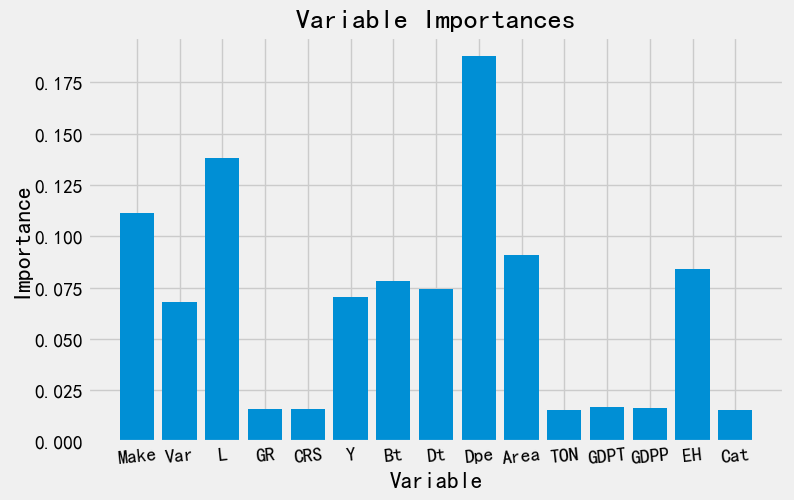

In [10]:
importances = list(forest_best.feature_importances_)
feature_list = ['Make','Var','L','GR','CRS','Y','Bt','Dt','Dpe','Area','TON','GDPT','GDPP','EH','Cat']
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

import matplotlib.pyplot as plt
 
x_values = list(range(len(importances)))
plt.figure(figsize=(8, 5))
plt.bar(x_values, importances, orientation='vertical')
plt.xticks(x_values, feature_list, rotation=6)
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')


In [11]:
y_pred =forest_best.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_pred, y_test))

# photo y_pred & y_test
print(forest_best.score(x_test,y_test))
#score

Mean Absolute Error: 40650.364928557814
0.7872069504994259


In [12]:
from sklearn.tree import export_graphviz
import os

for index, Tree_estimator in enumerate(forest_best):
    export_graphviz(Tree_estimator,
                    out_file='tree{}.dot'.format(index),
                    feature_names=feature_list,
                    rounded=True,
                    proportion=False,
                    precision=2,
                    filled=True)
    os.system('dot -Tpng tree{}.dot -o tree{}.png'.format(index, index))



In [ ]:
# from six import StringIO
# from IPython.display import Image
# from sklearn.tree import export_graphviz
# #这个到时候使用graphviz库
# import pydotplus
# import os
# # os.environ['PATH'] = os.environ['PATH']+';'+r"D:\CLibrary\Graphviz2.44.1\bin\graphviz"
# dot_data = StringIO()
# export_graphviz(pipe.named_steps['regressor'].estimators_[0],
#                 out_file=dot_data)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('tree.png')
# Image(graph.create_png())


In [ ]:
#graphviz

In [ ]:
# data = pd.read_excel('香港(3).xlsx',index_col=0)
# # 特征数据和标签数据拆分，y为标签数据，除y之外的为特征数据；
# Y = data['Listing Price (USD)']
# X =  data.drop(columns=['Listing Price (USD)'])
# list(Y)

In [ ]:
# score = forest.score(x_test, y_test)